# Espérance et loi des grands nombres

**Note: Les blocs de code de cette fiche sont *interactifs*: vous pouvez double-cliquer dessus, moidifier leur contenu et/ou exécuter à nouveau le code à l'intérieur en appuyant sur Maj + Entrée.**

Nous avons vu, dans notre cours, ce qu'est une **variable aléatoire**: une fonction qui à chaque issue d'une expérience aléatoire associe un nombre. Nous avons aussi vu comment calculer une valeur en particulier, que l'on appelle **l'espérance**.

Nous allons voir ici, par l'exemple de la roulette, que l'espérance d'une variable aléatoire est une valeur très intéressante lorsque l'on veut étudier la variable, grâce à un théorème mathématique *très* important: la **loi de grands nombres**.

## Un problème: la roulette française

Pour cela, nous allons "jouer" à la roulette français (spoil: n'y jouez jamais réellement en casino). Hop, nous allons toute la classe au casino pour une sortie pédagogique, après avoir pris 18 ans chacun, et on se dirige vers la table de jeu.

Un des paris que nous allons pouvoir faire, selon [ce document](https://docs.google.com/document/d/1N-QZC5zoDVxyepuI65WX1MuOofjYPJuceNRREsQyJgg/edit), c'est de parier sur la douzaine: on va parier, par exemple, que le numéro tiré sera entre 1 et 12. On va parier, disons, $10$ euros à chaque fois sur ça. Lorsque l'on gagnera, nous allons obtenir $2 \times 10 = 20$ €, ce qui fait, en prenant en compte que l'on a dépensé $10$ €, un gain net de $20 - 10 = 10$ €.

Alors, à votre avis, si l'on parie un très grand nombre de fois sur la douzaine, combien d'argent allons-nous gagner ou perdre en moyenne ? Pour le savoir, nous allons faire le test, tout simplement ! Mais puisque nous n'avons pas un porte-monnaie extensible et le temps nécessaire, et pour cause de confinement, nous n'allons pas tester tout ceci avec Python !

J'en vois au fond qui sont tombés dans les pommes... Le choc émotionnel, surement... Bon, pendant que j'emmène les autres à l'infirmerie, je vous rassure tout de suite: on va faire ça pas-à-pas, et avec un harnais comme à l'accrobranche, ne vous inquiétez pas ! Ca sera aussi le moment de vous faire découvrir une notion de première spé maths: les listes. Pareil, nous allons voir ça en temps et en heure.

## Simulation en Python

Donc, voici notre objectif: nous allons simuler, avec Python, des tirages à la roulette. Nous allons alors, à chaque tirage, calculer le gain (ou la perte) que nous avons en moyenne pour le moment, et voir comment cette moyenne évolue.

### Le module `random`

Une première chose qui nous vient à l'esprit tout de suite, c'est: comment va-t-on faire pour simuler un tirage aléatoire à la roulette française ? A chaque lancers de la roulette, un nombre entre $0$ et $36$ va sortir, au hasard. Comment demander à Python de faire ça ?

Pour le faire, nous allons utiliser un module spécialisé dans les **nombres pseudo-aléatoires** (pourquoi "pseudo" ? Parce que la Vie n'est pas parfaite, et que c'est impossible pour un ordinateur de générer des nombres parfaitement aléatoire...). Ce module s'appelle... `random` (c'est vrai, c'est pas ouf), et nous allons l'utiliser dans notre programme, en écrivant cette ligne:

In [1]:
import random

Le module `random` permet pas mal de choses marrantes (voici [sa documentation](https://docs.python.org/fr/3/library/random.html), mais nous allons ici utiliser une des fonctions, la fonction `randint` qui prend deux nombres `a` et `b`, prend au hasard un nombre en `a` et `b` compris et le renvoie:

In [2]:
print(random.randint(1,3))
print(random.randint(1,3))

3
2


Nous pouvons, avec cette fonction, simuler un tirage à la roulette: pour cela, nous allons créer une fonction `expérience` qui, lorsqu'on l'appelle, va tirer un nombre entre $0$ et $36$ (comme à la roulette). Si ce nombre est en $1$ et $12$, on aura gagné au final $10$€. Sinon, on aura perdu $10$€. La fonction va alors nous renvoyer le gain à la fin du tirage.

Voici la bête:

In [3]:
def expérience():
    """Simule un tirage à la roulette et renvoie le gain."""
    nombre = random.randint(0, 36)
    if 1 <= nombre <= 12 :
        return 10
    else:
        return -10

Si on la teste, on voit qu'elle fonctionne parfaitement:

In [4]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

print(expérience())
print(expérience())
print(expérience())

10
-10
-10


### La notion de liste

Maintenant, nous voudrions utiliser cette fonction pour faire un *grand* nombre de tirage et les stocker. Comment faire ? Nous pourrions créer plusieurs variables, dans lesquels il y aurait les résultats, comme ceci:

In [5]:
var0 = expérience()
var1 = expérience()
var2 = expérience()
var3 = expérience()
#...

print((var0 + var1 + var2 + var3) / 4)

0.0


Mais vous voyez bien le problème: c'est très répétitif... Et là, on voudrait pas faire juste 4 tirages, mais 1000, voir *100000* !

Nous allons donc ici utiliser les **listes**. Une **liste** est un type de données (comme un entier, une chaine de caractère ou un nombre à virgule), mais qui contient dedans un certain nombre de *"boîtes"*. Chaque *"boîte"* se voit attribuer un numéro, son **index** (la 1ere a le numéro 0, la 2eme le numéro 1, etc.). Ainsi, pour accéder à la boîte, il faudra donner son numéro, et on pourra alors avoir accès à son contenu, ou alors changer son contenu. L'intérêt est alors qu'on n'a besoin de ne créer *qu'une* liste, puis la modifier, au lieu d'avoir *plein* de variables et de devoir toutes les gérer indépendamment.

Voici un exemple de liste, pour illustrer:

In [6]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

# Création de la liste
ma_liste = [1, 5, "un texte", -0.54, "un autre"]

# Affichage de toute la liste
print(ma_liste)

# Affiche le premier nombre
print(ma_liste[0])

# Affiche le deuxième
print(ma_liste[1])

# Modifie la troisème valeur
ma_liste[2] = "J'en prendrais"

# Affiche la liste ainsi modifiée
print(ma_liste)

[1, 5, 'un texte', -0.54, 'un autre']
1
5
[1, 5, "J'en prendrais", -0.54, 'un autre']


Faites bien attention à ceci: une liste de longueur $n$ contient des boîtes numérotées de $0$ à $n-1$. *C'est une erreur fréquente* lorsqu'on découvre les listes, mais vous inquiétez pas, on s'y fait.

Les listes vont nous être très utiles ici: il nous suffit de créer une liste, de la taille qu'on veut, puis de la remplir avec pleins de résultats de nos tirages. Voici la fonction `liste_expérience` qui crée une liste de `taille` éléments et la remplit comme dit:

In [7]:
def liste_expérience(taille):
    """Crée une liste contenant `taille` résultats à la roulette française."""
    résultat = [0] * taille # Crée une liste de `taille` éléments, rempli avec des 0
    for i in range(taille): # Pour i allant de 0 à taille-1
        résultat[i] = expérience() # Remplit la i-éme boîte avec le résultat d'un tirage
    return résultat # Renvoie la liste entière

Et là, vous voyez un des intérêts de `for i in range(n)`: en effet, dans ces boucles, la valeur `i` va changer à chaque répétition et aller de `0` à `n-1`. Pratique pour remplir une liste !

Et là, nous avons une certaine *satisfaction* quand on teste notre fonction:

In [8]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

print(liste_expérience(15))
print(liste_expérience(20))

[-10, -10, -10, 10, 10, -10, -10, -10, -10, 10, 10, -10, -10, -10, -10]
[10, 10, -10, -10, -10, -10, -10, -10, -10, 10, -10, -10, -10, -10, -10, 10, -10, -10, -10, -10]


# Calcul de la moyenne au cours du temps

Bien, nous arrivons maintenant à avoir autant de tirages que l'on veut, ordonnés dans une liste. Passons maintenant à la deuxième étape de notre programme: nous devons calculer à chaque nouveau tirage le gain moyen pour le moment.

Pour calculer cette moyenne, nous devons calculer, à chaque instant, la somme des gains et pertes (le total), puis le diviser par le nombre de tirages que nous avons fait.

Une manière de calculer la moyenne à chaque instant est alors d'avoir une variable `gain_total` qui sera la somme des gains et pertes, que l'on divise par le nombre de tirages effectués. Pour chaque tirage, on ajoutera alors à `gain_total` le gain obtenu, on augmentera le nombre de tirages de 1, on calculera la moyenne et on l'ajoutera à une liste qui contiendra les moyennes successives, `liste_moyennes`.

On pourrait alors avoir cet algorithme:

```
gain_total = 0
nombre_tirages = 0
liste_moyennes = []
Pour chaque élément de liste_tirages:
    Ajouter l'élément à gain_total
    Augmenter nombre_tirages de 1
    Ajouter à liste_moyennes la valeur (gain_total / nombre_tirages)
```

Prenez un peu de temps pour bien lire et comprendre ce que l'on vient d'écrire, car on va devoir maintenant traduire ceci en Python !

Les trois premières lignes du programme sont évidentes à traduire. Les trois dernières, on peut les traduire avec un peu de réflexion (on verra ça un peu après). Mais comment faire pour la quatrième ? Vous allez être un peu supris, mais c'est très simple: `for élément in liste_tirage` !

Et c'est maintenant qu'il faut lever le voile sur la boucle `for`. Depuis la seconde, nous l'avons utilisé sous cette forme, `for i in range(n)`. Cela répétait alors les instructions décalées vers la droite, et à chaque répétition, la variable `i` changeait, allant de $0$ à $n-1$. Mais en fait, on peut très bien remplacer `range` par une liste: la variable `i` va alors changer de valeur à chaque répétition, mais cette fois, elle va prendre, une par une, dans l'ordre, les valeurs contenues dans la liste !

Pour mieux comprendre ça, voici un petit exemple:

In [9]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

liste_exemple = [1, 6, "blabla", 2.5]
for élément in liste_exemple:
    print("La valeur de élément est", élément)

La valeur de élément est 1
La valeur de élément est 6
La valeur de élément est blabla
La valeur de élément est 2.5


Vous voyez ici que `élément` vaut, tour à tour, `1`, `6`, `"blabla"` et `2.5`.

Mais alors, qu'est-ce que `range` ? C'est en fait un type spécial qui contient des valeurs dans un certain intervalle ! Il a été fait exprès par les créateurs de Python afin de l'utiliser pour des répétitions, et pour que les boucles `for i in range(n)` fonctionne un peu comme dans les autres langages (pour pas paumer les experts de C/C++ par exemple, et parce qu'il n'y a aucune raison de se révolter).

Cette manière d'écrire est très pratique avec les listes: ainsi, lorsqu'on a une liste, on peut étudier ses valeurs une à une, dans l'ordre. C'est par exemple très pratique pour nous, car on a une liste de gains et pertes, dans l'ordre où elles sont tirées, et on va alors faire évoluer la moyenne.

Avec ceci, on peut créer une fonction, `moyennes_successives`, qui prend une liste `liste_données`, calcule au fur et à mesure les moyennes, les ajoute dans une liste `liste_moyenne` et renvoie `liste_moyenne`.

In [10]:
def moyennes_successives(liste_données):
    gain_total = 0
    nombre_tirages = 0
    liste_moyennes = []
    for gain in liste_données:
        gain_total = gain_total + gain
        nombre_tirages = nombre_tirages + 1
        liste_moyennes.append(gain_total / nombre_tirages)
    return liste_moyennes

Vous remarquez alors la ligne `liste_moyennes.append(gain_total / nombre_tirage)`. Cette ligne permet d'ajouter à la fin `liste_moyennes` une "boîte", contenant `gain_total / nombre_tirages`. Il existe aussi une manière d'enlever la dernière boîte d'une liste, en écrivant `liste.pop()`.

On peut alors tester cette fonction avec quelques listes (pas forcément des tirages de roulette):

In [11]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

print(moyennes_successives([1, 1, 1, 1]))
print(moyennes_successives([1, 0, 1]))
print(moyennes_successives([]))

[1.0, 1.0, 1.0, 1.0]
[1.0, 0.5, 0.6666666666666666]
[]


Et ça fonctionne !

Maintenant, c'est bon, nous avons tous ce qu'il faut pour simuler des tirages à la roulette et voir comment évolue notre gain moyen à la roulette.

## Le résultat !

Aaah, les allergiques de Python sont revenues ! Vous avez pas eu trop mal, pendant cette partie ? De toutes façons, c'est bientôt terminé, ne vous en faites pas !

(Bon, plus sérieusement, la situation est encore assez critique pour l'intégration de Python dans les cours, trois ans après la réforme, et c'est très dommage, on peut vraiment avoir un support pédagogique (comme ici pour la loi des grands nombres) très intuitif et pratique... Enfin bon... Sachez que vous n'êtes pas seul si vous ne comprenez pas très bien la programmation Python.)

Donc, vous l'attendiez tous, nous allons voir quel est le gain moyen en pariant sur la douzaine ! Je vais ici faire des tests avec de plus en plus d'essais:

In [12]:
# Vous pouvez modifier le code et le ré-exécuter en faisant Maj+Entrée.

échantillon = liste_expérience(20000)
moyennes = moyennes_successives(échantillon)

print(moyennes[0])
print(moyennes[99])
print(moyennes[9999])
print(moyennes[-1])

10.0
-4.4
-3.406
-3.453


Nous voyons alors que notre gain moyen est en fait... Une perte moyenne: nous avons perdu $-3,51$ € à chaque tirage en moyenne ! Pour 10000000 tirages, je vous laisse calculer, ça fait... $-351000000$ € au total ! Heureusement que l'on est pas allé au casino pour faire ça !

Mais regardez comment évolue la moyenne au fur et à mesure que l'on augmente le nombre d'essais ! Pour cela, je reprends la liste `moyennes`, mais je vais afficher les moyennes sous forme de graphique (pas besoin de connaitre comment faire, même si faire vos propres petits graphiques peu être marrant):

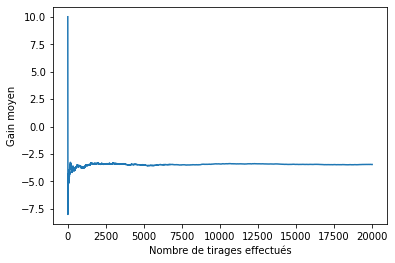

In [13]:
import matplotlib.pyplot as plt

nbEssais = list(range(1, len(moyennes) + 1))

plt.plot(nbEssais, moyennes)

plt.xlabel("Nombre de tirages effectués")
plt.ylabel("Gain moyen")
plt.show()

Commentons ce graphique: tout d'abord, au premier tirage, la moyenne peut être soit de $-10$, soit de $10$ (logique). La moyenne va alors beaucoup changer jusqu'aux environs de 2500 essais (on voit dans cette zone de grands pics et de grand creux). Puis, la moyenne semble devenir de moins en moins changeante (puisqu'un nouveau tirage, parmi quelques milliers d'autres, va plus beaucoup influencer la moyenne), et la courbe semble se stabiliser aux alentours de $-3.5$... Comme le montre les valeurs que l'on avait calculé juste avant !

La moyenne semble donc converger vers un nombre, ici $-3,5$, au fur et à mesure que l'on augmente le nombre de tirages. mais comment aurions-nous pu le savoir à l'avance, sans avoir besoin de simuler plusieurs milliers de tirages à la roulette ?

C'est là qu'il faut invoquer un des Pokémons légendaires des probabilités: j'ai nommé... la loi des grands nombres !

## La loi des grands nombres

Cette loi est très importante en statistique: en effet, elle nous montre un moyen de savoir vers quel résultat moyen on va tendre en réaliser un grand nombre de fois (d'où son nom) une expérience aléatoire.

En effet, cette loi nous dit ceci:

> Lorsque le nombre $n$ d'observations à l'issue d'une expérience aléatoire tend vers l'infini, la moyenne de ces observations s'approche de l'espérance de l'expérience.

Autrement dit, lorsque que $n$ tend vers l'infini, la moyenne de $n$ observations d'une variable $G$ tend vers $E(G) = \sum_{i=0}^{n} P(G=x_i)x_i$, avec $x_0$, $x_1$, $x_2$... les différentes valeurs possibles de $G$.

C'est très intéressant, car cela nous permet, comme expliqué dans [cette vidéo](https://www.youtube.com/watch?v=HRnYFpdR8WM), de voir, dans un aléatoire par définition imprévisible, une forme de régularité et de certitude sur le long terme. Pour peu que le nombre de fois qu'on fait le test est suffisament grand, on peut imaginer que l'on aura en moyenne la même valeur.

C'est un phénomène que l'on retrouve au quotidien, dans la vie de tous les jours. Par exemple, la pression au baromètre, le courant électrique dans une lampe, les températures... changent en réalité à chaque centième de millisecondes, voir encore plus, mais lorsque l'on fait une observation sur un dizième de seconde par exemple, on aura une valeur moyenne qui change au final presque jamais, d'un dizième à l'autre. Sinon, imaginez votre thermomètre faire des allers-retours incessants, ou votre ampoule griller car elle s'allume et s'éteind sans cesse, et ça tout le temps !

Mais revenons à notre roulette: selon cette loi, notre gain moyen à la roulette tend bien vers un nombre précis (ça parait bête, mais on aurait pu juste avoir ces résultats par pur hasard), et ce nombre est l'espérance de la variable aléatoire du gain à la roulette.

Ainsi, il nous suffit de calculer l'espérance pour voir vers quoi tend ce gain moyen ! On dresse un petit tableau de la variable, et on fait le calcul:

| $G$ | $-10$ | $10$ |
| --- | --- | --- |
|$P(G=...) =$ | $\frac{12}{37}$ | $\frac{25}{37}$ |

Calcul de l'espérance:

$$
E(G) = P(G = 10) \times 10 + P(G = -10) \times (-10) \\
E(G) = \frac{12}{37} \times 10 + \frac{25}{37} \times (-10) \\
E(G) = \frac{-130}{37} \\
E(G) \approx -3,5135
$$

Ainsi, selon la loi des grands nombres, le gain moyen va tendre, en jouent un grand nombre de fois, vers $-3,5135$ € environ. Donc, on a la triste nouvelle que l'on perdra notre argent à beaucoup y jouer...

Remarquez bien qu'avec 20000 tirages, nous avons obtenu un résultat assez proche de cette espérance ! La loi des grands nombres est bien confirmé ici: plus l'on fait de tirage à la roulette, plus la moyenne est proche de l'espérance.